In [1]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 读取数据
data = pd.read_csv(r'C:\Users\admin\Desktop\21大数据一班 肖博臻\波士顿房价数据集\波士顿房价数据集/boston.csv')

print('数据基本信息：')
data.info()

# 查看数据集行数和列数
rows, columns = data.shape

if rows < 100 and columns < 20:
    # 短表数据（行数少于100且列数少于20）查看全量数据信息
    print('数据全部内容信息：')
    print(data.to_markdown(numalign='left', stralign='left'))


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
# 准备自变量和因变量数据
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# 数据预处理：标准化自变量
X = (X - X.mean()) / X.std()

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

# 将数据转换为 PyTorch 的张量
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


Epoch [10/100], Loss: 64.9220
Epoch [20/100], Loss: 25.3869
Epoch [30/100], Loss: 23.0675
Epoch [40/100], Loss: 25.2254
Epoch [50/100], Loss: 22.7921
Epoch [60/100], Loss: 21.8253
Epoch [70/100], Loss: 23.6698
Epoch [80/100], Loss: 22.9068
Epoch [90/100], Loss: 22.8245
Epoch [100/100], Loss: 27.0233


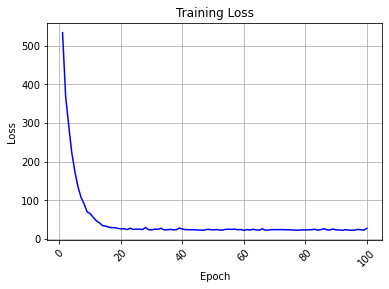

In [4]:
# 创建数据集和数据加载器
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 定义模型参数的维度
input_size = X_train.shape[1]
output_size = 1

# 创建线性回归模型
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(input_size, output_size)

# 定义损失函数和优化器
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 初始化数据用于可视化损失下降曲线
train_loss = []

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        # 前向传播
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, labels)
        # 反向传播和优化器更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 将每个 epoch 的训练损失添加到 train_loss 列表中
    train_loss.append(running_loss / len(train_loader))

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss[-1]:.4f}')

# 可视化损失下降曲线
plt.plot(range(1, num_epochs+1), train_loss, 'b', label='Training Loss')
plt.xlabel('Epoch')
plt.xticks(rotation=45)
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()